In [1]:
import pandas as pd
import os
import numpy as np
from PIL import Image 
from tensorflow.keras.preprocessing import image


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Reshape, Concatenate, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import patches
style.use('ggplot')


from tensorflow.keras.utils import to_categorical


In [2]:
os.getcwd()

'C:\\Users\\sarth\\Anaconda projects\\self projects and others\\Facemask detection\\model'

In [3]:
path = "C:\\Users\\sarth\\Anaconda projects\\self projects and others\\Facemask detection\\Main data\\images\\"
path2 = 'C:\\Users\\sarth\\Anaconda projects\\self projects and others\\\Facemask detection\\Main data\\images\\'
path3 = 'C:\\Users\\sarth\\Anaconda projects\\self projects and others\\Facemask detection\\kaggle\\1\\observations-master\\experiements\\dest_folder\\'

In [4]:
data_train3 = pd.read_csv('main_file.csv')
data_train3.head()

,Unnamed: 0,filename,class
0,0,C:\Users\sarth\Anaconda projects\self projects...,with_mask
1,1,C:\Users\sarth\Anaconda projects\self projects...,with_mask
2,2,C:\Users\sarth\Anaconda projects\self projects...,with_mask
3,3,C:\Users\sarth\Anaconda projects\self projects...,with_mask
4,4,C:\Users\sarth\Anaconda projects\self projects...,with_mask


In [5]:
data_train3 = data_train3.drop(['Unnamed: 0'], axis = 1)
data_train3.head()

,filename,class
0,C:\Users\sarth\Anaconda projects\self projects...,with_mask
1,C:\Users\sarth\Anaconda projects\self projects...,with_mask
2,C:\Users\sarth\Anaconda projects\self projects...,with_mask
3,C:\Users\sarth\Anaconda projects\self projects...,with_mask
4,C:\Users\sarth\Anaconda projects\self projects...,with_mask


In [6]:
len(data_train3)

1843

### Images

In [7]:
import cv2
IMAGE_HEIGHT = 324
IMAGE_WIDTH = 324
X_train = np.zeros((len(data_train3), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for i in range(len(data_train3)):
    img = Image.open(data_train3.iloc[i,0])
    img = img.resize((IMAGE_HEIGHT, IMAGE_WIDTH)) 
    img = img.convert('RGB')
    X_train[i] = preprocess_input(np.array(img, dtype=np.float32))
    img.close()

In [8]:
X_train.shape

(1843, 324, 324, 3)

In [9]:
393

393

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


86


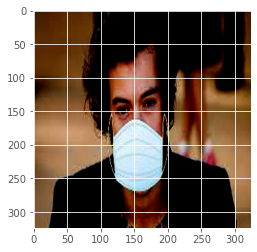

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


with_mask
1175


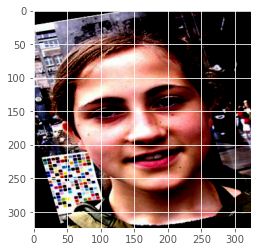

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


without_mask
1062


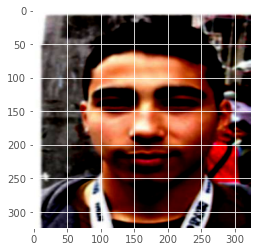

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


without_mask
258


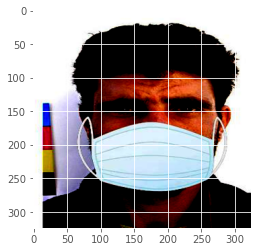

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


with_mask
145


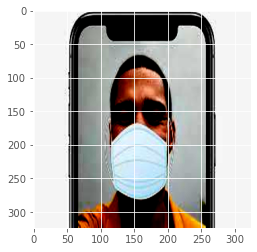

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


with_mask
466


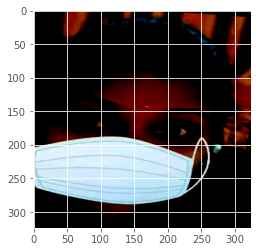

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


with_mask
294


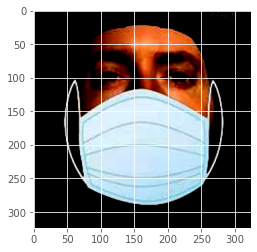

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


with_mask
1297


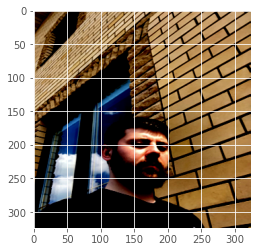

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


without_mask
1143


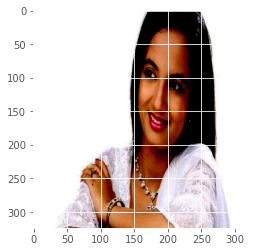

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


without_mask
1763


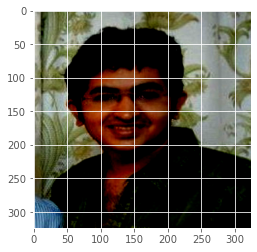

without_mask


In [10]:
import random
for i in range(0,10):
    fig,ax = plt.subplots(1)
    z = random.randint(0,len(data_train3))
    print(z)
    plt.imshow(X_train[z])
    plt.show()
    print(data_train3.iloc[z,1])

In [11]:
data_train3['class'].unique()

array(['with_mask', 'without_mask'], dtype=object)

In [12]:
data_train3['class'] = data_train3['class'].replace('with_mask', 0)
data_train3['class'] = data_train3['class'].replace('without_mask', 1)

In [13]:
data_train3.tail(10)

,filename,class
1833,C:\Users\sarth\Anaconda projects\self projects...,0
1834,C:\Users\sarth\Anaconda projects\self projects...,1
1835,C:\Users\sarth\Anaconda projects\self projects...,1
1836,C:\Users\sarth\Anaconda projects\self projects...,0
1837,C:\Users\sarth\Anaconda projects\self projects...,1
1838,C:\Users\sarth\Anaconda projects\self projects...,0
1839,C:\Users\sarth\Anaconda projects\self projects...,1
1840,C:\Users\sarth\Anaconda projects\self projects...,0
1841,C:\Users\sarth\Anaconda projects\self projects...,1
1842,C:\Users\sarth\Anaconda projects\self projects...,1


In [14]:
y_train = 0
y_train = data_train3['class'].values

In [15]:
y_train

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [16]:
y_train.shape

(1843,)

In [17]:
y_train[1504]

1

In [18]:
X_train[1504]

array([[[-1.        , -0.98431373, -1.        ],
        [-1.        , -0.98431373, -1.        ],
        [-1.        , -0.98431373, -1.        ],
        ...,
        [-0.99215686, -0.97647059, -0.98431373],
        [-1.        , -0.98431373, -0.99215686],
        [-1.        , -0.98431373, -0.99215686]],

       [[-1.        , -0.98431373, -1.        ],
        [-1.        , -0.98431373, -1.        ],
        [-1.        , -0.98431373, -1.        ],
        ...,
        [-0.99215686, -0.97647059, -0.98431373],
        [-1.        , -0.98431373, -0.99215686],
        [-1.        , -0.98431373, -0.99215686]],

       [[-1.        , -0.98431373, -1.        ],
        [-1.        , -0.98431373, -1.        ],
        [-1.        , -0.98431373, -1.        ],
        ...,
        [-0.99215686, -0.97647059, -0.98431373],
        [-1.        , -0.98431373, -0.99215686],
        [-1.        , -0.98431373, -0.99215686]],

       ...,

       [[-0.99215686, -0.99215686, -0.99215686],
        [-0

In [19]:
X_train.shape

(1843, 324, 324, 3)

In [20]:
X_train

array([[[[-0.53725493, -0.49019605, -0.70980394],
         [-0.60000002, -0.53725493, -0.74901962],
         [-0.65490198, -0.57647061, -0.78039217],
         ...,
         [-0.66274512, -0.62352943, -0.81960785],
         [-0.74901962, -0.70980394, -0.90588236],
         [-0.78039217, -0.73333335, -0.88235295]],

        [[-0.56078434, -0.51372552, -0.73333335],
         [-0.60784316, -0.54509807, -0.75686276],
         [-0.64705884, -0.57647061, -0.7647059 ],
         ...,
         [-0.70980394, -0.67058825, -0.85882354],
         [-0.74117649, -0.69411767, -0.88235295],
         [-0.77254903, -0.71764708, -0.85882354]],

        [[-0.60000002, -0.5529412 , -0.75686276],
         [-0.62352943, -0.57647061, -0.75686276],
         [-0.65490198, -0.58431375, -0.77254903],
         ...,
         [-0.81176472, -0.74901962, -0.9137255 ],
         [-0.74901962, -0.68627453, -0.85882354],
         [-0.74117649, -0.68627453, -0.81960785]],

        ...,

        [[-0.56078434, -0.44313723, -0

In [21]:
y=0
y = to_categorical(data_train3['class'], num_classes=2)

In [22]:
y.shape

(1843, 2)

In [23]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## model

In [130]:
res = ResNet50(include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

for layer in res.layers:
    layer.trainable = True

x = res.layers[-1].output    
flat1 = Flatten()(x)
class1 = Dense(100, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(class1)

model1 = Model(inputs=res.inputs, outputs=output)

In [131]:
#model summary
model1.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 324, 324, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 330, 330, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 162, 162, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 162, 162, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [132]:
#compiling model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [133]:
#Fitting model
r = model1.fit(
  X_train,
  y_train,
  batch_size=10,
  epochs=3,
  validation_split=0.10,
  #callbacks=[checkpoint, reduce_lr, stop],
 # callbacks=[reduce_lr],  
  verbose=1
)

Train on 1658 samples, validate on 185 samples
Epoch 1/3
1658/1658 [==============================] - 69s 41ms/sample - loss: 2.8155 - accuracy: 0.8366 - val_loss: 0.6957 - val_accuracy: 0.4000
Epoch 2/3
1658/1658 [==============================] - 62s 37ms/sample - loss: 0.8203 - accuracy: 0.8782 - val_loss: 0.6546 - val_accuracy: 0.5946
Epoch 3/3
1658/1658 [==============================] - 62s 37ms/sample - loss: 0.7161 - accuracy: 0.9228 - val_loss: 0.6221 - val_accuracy: 0.6649


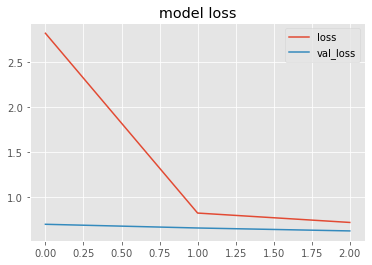

In [135]:
# plot model loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.legend()
plt.show()

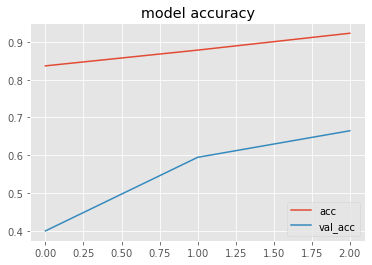

In [136]:
#plot model accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title('model accuracy')
plt.legend()
plt.show()

In [137]:
#predicting one image from validation step
n=121
img=X_train[n].reshape(1,IMAGE_HEIGHT,IMAGE_WIDTH,3)
k=model1.predict(img)
print(k)
print(y_train[n])

[[0.4566768]]
0


In [138]:
#Evaluate validation set and then print accuracy
results = model1.evaluate(X_train, y_train)
print('accuracy: ', results[1])

1843/1843 [==============================] - 18s 10ms/sample - loss: 0.4608 - accuracy: 0.7813
accuracy:  0.78133476


In [139]:
results

[0.4608314931877786, 0.78133476]

In [140]:
#Getting prediction of test set
prediction_test = model1.predict(X_train)

In [141]:
prediction_test

array([[0.707626  ],
       [0.5456576 ],
       [0.15602027],
       ...,
       [0.80826724],
       [0.9172515 ],
       [0.632707  ]], dtype=float32)

In [142]:
#Set threshold
#we want the value to be either 0 or 1
pred=np.zeros((len(y_train),))
count=0
for i in prediction_test:
    if i>0.5:  #Got .5 after many hit and try
        pred[count]=1
    
    else:
        pred[count]=0
    
    count+=1

#Threshold is 0.5

In [143]:
#print accuracy score, f1 score, precision, recall and classification report
print("accuracy : {0:.4f}".format(accuracy_score(y_train,pred)))
print("F1 score : {0:.4f}".format(f1_score(y_train,pred)))
print("precision score : {0:.4f}".format(precision_score(y_train,pred)))
print("recall score : {0:.4f}".format(recall_score(y_train,pred)))
print('Confusion Matrix:\n',confusion_matrix(y_train,pred),'\n')
print(metrics.classification_report(y_train,pred))

accuracy : 0.7813
F1 score : 0.8219
precision score : 0.7051
recall score : 0.9852
Confusion Matrix:
 [[510 389]
 [ 14 930]] 

              precision    recall  f1-score   support

           0       0.97      0.57      0.72       899
           1       0.71      0.99      0.82       944

    accuracy                           0.78      1843
   macro avg       0.84      0.78      0.77      1843
weighted avg       0.84      0.78      0.77      1843



In [144]:
#print AUC for train set
aucs = []
for j in range(6):
    auc = roc_auc_score(y_train, prediction_test)
    aucs.append(auc)
print(np.mean(aucs))

0.9032387681227728


In [145]:
#prediction of 1 image
n=104
print("X_test shape = ",X_train.shape) #To see shape of X_test

x=X_train[n]  #Put test value in x
print("Shape of x = ",x.shape)
#AS you can see it is out of shape when comared to x_test because it is a single value therefore we need to reshape it

x2=x.reshape(1,IMAGE_HEIGHT,IMAGE_WIDTH,3) #Reshape to (1,300) so to put in our model if not done this step it will throw error as our model accept this shape only

print("New Shape of x = ",x2.shape) #Cross check step to see our new shape

P=model1.predict(x2) #predict x based on our model

P2 = 1 if P>0.5 else 0  #Setting threshold if value less than 0.5 it is -ve review otherwise poistive

print("\n")
print("Predicted review = ",P2) #predicted review
print("Actual value = ",y_train[n])

X_test shape =  (1843, 324, 324, 3)
Shape of x =  (324, 324, 3)
New Shape of x =  (1, 324, 324, 3)


Predicted review =  0
Actual value =  0


## normal

In [42]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [47]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 2, activation = 'softmax'))


C:\Users\sarth\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(324, 324,..., activation="relu")`
  """
C:\Users\sarth\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sarth\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\Users\sarth\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=2)`


In [48]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 322, 322, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 161, 161, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 159, 159, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 79, 79, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 199712)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               25563264  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [49]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
r = classifier.fit(
  X_train,
  y,
  batch_size=10,
  epochs=7,
  validation_split=0.10,
  #callbacks=[checkpoint, reduce_lr, stop],
  verbose=1
)

Train on 1658 samples, validate on 185 samples
Epoch 1/7
1658/1658 [==============================] - 15s 9ms/step - loss: 0.6997 - accuracy: 0.8794 - val_loss: 0.5314 - val_accuracy: 0.8162
Epoch 2/7
1658/1658 [==============================] - 14s 8ms/step - loss: 0.1012 - accuracy: 0.9644 - val_loss: 0.3501 - val_accuracy: 0.8703
Epoch 3/7
1658/1658 [==============================] - 14s 8ms/step - loss: 0.0535 - accuracy: 0.9825 - val_loss: 0.3289 - val_accuracy: 0.8757
Epoch 4/7
1658/1658 [==============================] - 14s 8ms/step - loss: 0.0457 - accuracy: 0.9885 - val_loss: 0.4877 - val_accuracy: 0.8486
Epoch 5/7
1658/1658 [==============================] - 14s 9ms/step - loss: 0.0292 - accuracy: 0.9934 - val_loss: 0.5554 - val_accuracy: 0.8595
Epoch 6/7
1658/1658 [==============================] - 14s 9ms/step - loss: 0.0351 - accuracy: 0.9910 - val_loss: 0.6902 - val_accuracy: 0.8432
Epoch 7/7
1658/1658 [==============================] - 14s 8ms/step - loss: 0.0908 - accu

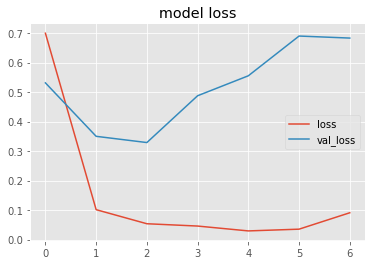

In [57]:
# plot model loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.legend()
plt.show()

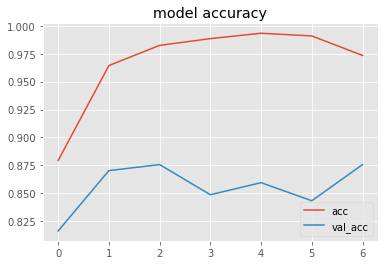

In [58]:
#plot model accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title('model accuracy')
plt.legend()
plt.show()

In [54]:
#predicting one image from validation step
n=121
img=X_train[n].reshape(1,IMAGE_HEIGHT,IMAGE_WIDTH,3)
k=classifier.predict(img)[0,:]
k = np.argmax(k)
print(k)
print(y_train[n])

0
0


In [79]:
#Evaluate validation set and then print accuracy
results = classifier.evaluate(X_train, y)
print('accuracy: ', results[1])

1843/1843 [==============================] - 7s 4ms/step
accuracy:  0.982094407081604


In [80]:
#Getting prediction of test set
prediction_test = classifier.predict(X_train)

In [81]:
#Set threshold
#we want the value to be either 0 or 1
pred=np.zeros((len(y_train),))
count=0
for i in prediction_test:
    if i>0.5:  #Got .5 after many hit and try
        pred[count]=1
    
    else:
        pred[count]=0
    
    count+=1

#Threshold is 0.5

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [82]:
#print accuracy score, f1 score, precision, recall and classification report
print("accuracy : {0:.4f}".format(accuracy_score(y_train,pred)))
print("F1 score : {0:.4f}".format(f1_score(y_train,pred)))
print("precision score : {0:.4f}".format(precision_score(y_train,pred)))
print("recall score : {0:.4f}".format(recall_score(y_train,pred)))
print('Confusion Matrix:\n',confusion_matrix(y_train,pred),'\n')
print(metrics.classification_report(y_train,pred))

accuracy : 0.4878
F1 score : 0.0000
precision score : 0.0000
recall score : 0.0000
Confusion Matrix:
 [[899   0]
 [944   0]] 

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       899
           1       0.00      0.00      0.00       944

    accuracy                           0.49      1843
   macro avg       0.24      0.50      0.33      1843
weighted avg       0.24      0.49      0.32      1843



C:\Users\sarth\Anaconda3\envs\gputest\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarth\Anaconda3\envs\gputest\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
#print AUC for train set
aucs = []
for j in range(6):
    auc = roc_auc_score(y_train, prediction_test)
    aucs.append(auc)
print(np.mean(aucs))

ValueError: bad input shape (1843, 2)

In [ ]:
#prediction of 1 image
n=1041
print("X_test shape = ",X_train.shape) #To see shape of X_test

x=X_train[n]  #Put test value in x
print("Shape of x = ",x.shape)
#AS you can see it is out of shape when comared to x_test because it is a single value therefore we need to reshape it

x2=x.reshape(1,IMAGE_HEIGHT,IMAGE_WIDTH,3) #Reshape to (1,300) so to put in our model if not done this step it will throw error as our model accept this shape only

print("New Shape of x = ",x2.shape) #Cross check step to see our new shape

P=classifier.predict(x2) #predict x based on our model

P2 = 1 if P>0.5 else 0  #Setting threshold if value less than 0.5 it is -ve review otherwise poistive

print("\n")
print("Predicted review = ",P2) #predicted review
print("Actual value = ",y_train[n])

### MOBILE NET

In [63]:
ALPHA = 1.0

In [64]:
mob = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights = "imagenet") 

for layer in mob.layers:
    layer.trainable = True

x = mob.layers[-1].output   

flat1 = Flatten()(x)
class1 = Dense(100, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(class1)

model2 = Model(inputs=mob.inputs, outputs=output)

C:\Users\sarth\Anaconda3\envs\gputest\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [65]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 324, 324, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 325, 325, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 162, 162, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 162, 162, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 162, 162, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 162, 162, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 162, 162, 32)      128 

In [66]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [67]:
r = model2.fit(
  X_train,
  y_train,
  batch_size=10,
  epochs=7,
  validation_split=0.10,
  #callbacks=[checkpoint, reduce_lr, stop],
  verbose=1
)

Train on 1658 samples, validate on 185 samples
Epoch 1/7
1658/1658 [==============================] - 36s 22ms/sample - loss: 1.3563 - accuracy: 0.9397 - val_loss: 0.8146 - val_accuracy: 0.9568
Epoch 2/7
1658/1658 [==============================] - 31s 19ms/sample - loss: 0.2163 - accuracy: 0.9686 - val_loss: 0.2495 - val_accuracy: 0.9676
Epoch 3/7
1658/1658 [==============================] - 31s 19ms/sample - loss: 0.1058 - accuracy: 0.9807 - val_loss: 0.2959 - val_accuracy: 0.9676
Epoch 4/7
1658/1658 [==============================] - 31s 19ms/sample - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.1603 - val_accuracy: 0.9730
Epoch 5/7
1658/1658 [==============================] - 31s 19ms/sample - loss: 0.0394 - accuracy: 0.9946 - val_loss: 0.1841 - val_accuracy: 0.9622
Epoch 6/7
1658/1658 [==============================] - 31s 19ms/sample - loss: 0.2790 - accuracy: 0.9698 - val_loss: 0.4484 - val_accuracy: 0.9297
Epoch 7/7
1658/1658 [==============================] - 31s 19ms/sample 

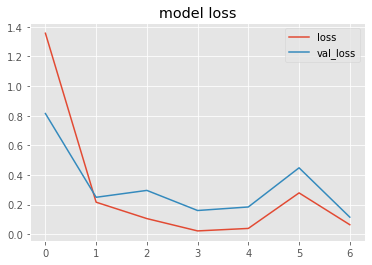

In [70]:
# plot model loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.legend()
plt.show()

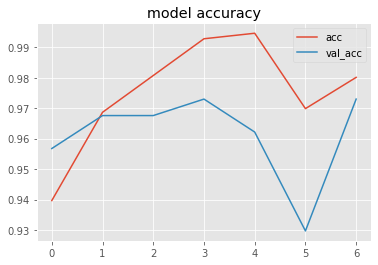

In [71]:
#plot model accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title('model accuracy')
plt.legend()
plt.show()

In [103]:
#predicting one image from validation step
n=121
img=X_train[n].reshape(1,IMAGE_HEIGHT,IMAGE_WIDTH,3)
k=model2.predict(img)[0,:]
print(k)
print(y_train[n])

[1.3228515e-21]
0


In [104]:
#Evaluate validation set and then print accuracy
results = model2.evaluate(X_train, y_train)
print('accuracy: ', results[1])

1843/1843 [==============================] - 8s 4ms/sample - loss: 0.0366 - accuracy: 0.9919
accuracy:  0.9918611


In [105]:
#Getting prediction of test set
prediction_test = model2.predict(X_train)

In [106]:
#Set threshold
#we want the value to be either 0 or 1
pred=np.zeros((len(y_train),))
count=0
for i in prediction_test:
    if i>0.5:  #Got .5 after many hit and try
        pred[count]=1
    
    else:
        pred[count]=0
    
    count+=1

#Threshold is 0.5

In [107]:
#print accuracy score, f1 score, precision, recall and classification report
print("accuracy : {0:.4f}".format(accuracy_score(y_train,pred)))
print("F1 score : {0:.4f}".format(f1_score(y_train,pred)))
print("precision score : {0:.4f}".format(precision_score(y_train,pred)))
print("recall score : {0:.4f}".format(recall_score(y_train,pred)))
print('Confusion Matrix:\n',confusion_matrix(y_train,pred),'\n')
print(metrics.classification_report(y_train,pred))

accuracy : 0.9919
F1 score : 0.9921
precision score : 0.9884
recall score : 0.9958
Confusion Matrix:
 [[888  11]
 [  4 940]] 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       899
           1       0.99      1.00      0.99       944

    accuracy                           0.99      1843
   macro avg       0.99      0.99      0.99      1843
weighted avg       0.99      0.99      0.99      1843



In [108]:
#print AUC for train set
aucs = []
for j in range(6):
    auc = roc_auc_score(y_train, prediction_test)
    aucs.append(auc)
print(np.mean(aucs))

0.9996830282234496


In [109]:
#prediction of 1 image
n=1041
print("X_test shape = ",X_train.shape) #To see shape of X_test

x=X_train[n]  #Put test value in x
print("Shape of x = ",x.shape)
#AS you can see it is out of shape when comared to x_test because it is a single value therefore we need to reshape it

x2=x.reshape(1,IMAGE_HEIGHT,IMAGE_WIDTH,3) #Reshape to (1,300) so to put in our model if not done this step it will throw error as our model accept this shape only

print("New Shape of x = ",x2.shape) #Cross check step to see our new shape

P=model2.predict(x2) #predict x based on our model

P2 = 1 if P>0.5 else 0  #Setting threshold if value less than 0.5 it is -ve review otherwise poistive

print("\n")
print("Predicted review = ",P2) #predicted review
print("Actual value = ",y_train[n])

X_test shape =  (1843, 324, 324, 3)
Shape of x =  (324, 324, 3)
New Shape of x =  (1, 324, 324, 3)


Predicted review =  1
Actual value =  1


### VGG16

In [177]:
x=0
vgg=0

In [178]:
#vgg = VGG19(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,3), weights='imagenet', include_top=False)
vgg = VGG19(include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_HEIGHT, 3), weights = "imagenet")
for layer in vgg.layers:
    layer.trainable = True

x = vgg.layers[-1].output    
flat = Flatten()(x)
class1 = Dense(50, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(class1)

model3 = Model(inputs=vgg.inputs, outputs=output)

In [179]:
model3.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 324, 324, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 324, 324, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 324, 324, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 162, 162, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 162, 162, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 162, 162, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 81, 81, 128)       0  

In [180]:
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
r = model3.fit(
  X_train,
  y_train,
  batch_size=5,
  epochs=5,
  validation_split=0.10,
  #callbacks=[checkpoint, reduce_lr, stop],
  verbose=1
)

In [151]:
model3.save('model3.h5') 

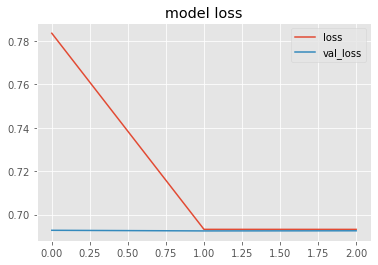

In [152]:
# plot model loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.legend()
plt.show()

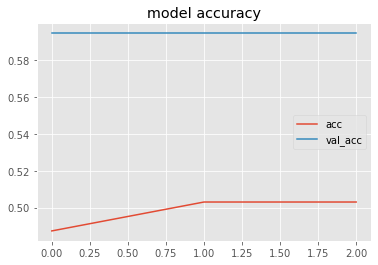

In [153]:
#plot model accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title('model accuracy')
plt.legend()
plt.show()

In [154]:
#predicting one image from validation step
n=121
img=X_train[n].reshape(1,IMAGE_HEIGHT,IMAGE_WIDTH,3)
k=model3.predict(img)[0,:]
print(k)
print(y_train[n])

[0.5016679]
0


In [155]:
#Evaluate validation set and then print accuracy
results = model3.evaluate(X_train, y_train)
print('accuracy: ', results[1])

1843/1843 [==============================] - 26s 14ms/sample - loss: 0.6931 - accuracy: 0.5122
accuracy:  0.51220834


In [156]:
#Getting prediction of test set
prediction_test = model3.predict(X_train)

In [157]:
#Set threshold
#we want the value to be either 0 or 1
pred=np.zeros((len(y_train),))
count=0
for i in prediction_test:
    if i>0.5:  #Got .5 after many hit and try
        pred[count]=1
    
    else:
        pred[count]=0
    
    count+=1

#Threshold is 0.5

In [158]:
#print accuracy score, f1 score, precision, recall and classification report
print("accuracy : {0:.4f}".format(accuracy_score(y_train,pred)))
print("F1 score : {0:.4f}".format(f1_score(y_train,pred)))
print("precision score : {0:.4f}".format(precision_score(y_train,pred)))
print("recall score : {0:.4f}".format(recall_score(y_train,pred)))
print('Confusion Matrix:\n',confusion_matrix(y_train,pred),'\n')
print(metrics.classification_report(y_train,pred))

accuracy : 0.5122
F1 score : 0.6774
precision score : 0.5122
recall score : 1.0000
Confusion Matrix:
 [[  0 899]
 [  0 944]] 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       899
           1       0.51      1.00      0.68       944

    accuracy                           0.51      1843
   macro avg       0.26      0.50      0.34      1843
weighted avg       0.26      0.51      0.35      1843



C:\Users\sarth\Anaconda3\envs\gputest\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
#print AUC for train set
aucs = []
for j in range(6):
    auc = roc_auc_score(y_train, prediction_test)
    aucs.append(auc)
print(np.mean(aucs))

0.5


In [160]:
#prediction of 1 image
n=1041
print("X_test shape = ",X_train.shape) #To see shape of X_test

x=X_train[n]  #Put test value in x
print("Shape of x = ",x.shape)
#AS you can see it is out of shape when comared to x_test because it is a single value therefore we need to reshape it

x2=x.reshape(1,IMAGE_HEIGHT,IMAGE_WIDTH,3) #Reshape to (1,300) so to put in our model if not done this step it will throw error as our model accept this shape only

print("New Shape of x = ",x2.shape) #Cross check step to see our new shape

P=model3.predict(x2) #predict x based on our model

P2 = 1 if P>0.5 else 0  #Setting threshold if value less than 0.5 it is -ve review otherwise poistive

print("\n")
print("Predicted review = ",P2) #predicted review
print("Actual value = ",y_train[n])

X_test shape =  (1843, 324, 324, 3)
Shape of x =  (324, 324, 3)
New Shape of x =  (1, 324, 324, 3)


Predicted review =  1
Actual value =  1


### Real time

In [2]:
import tensorflow as tf
#model1 = tf.keras.models.load_model('model1.h5')
model2 = tf.keras.models.load_model('model2.h5')
#model3 = tf.keras.models.load_model('model3.h5')  not to use
#classifier = tf.keras.models.load_model('normal.h5')

In [5]:
from time import sleep
from random import uniform
import time
import datetime
import cv2

In [6]:
clas = cv2.CascadeClassifier('C:/Users/sarth/Anaconda projects/self projects and others/VGG face/25. Face Recognition/Haarcascades/haarcascade_frontalface_default.xml')

In [9]:
IMAGE_HEIGHT, IMAGE_WIDTH = 324, 324

In [40]:
#Open Webcam
cap = cv2.VideoCapture(0) 

fps_start_time = datetime.datetime.now()
fps = 0
total_frames = 0

while(True):
   # sleep(0.4)
    ret, img = cap.read()
    faces2 = clas.detectMultiScale(img, 1.3, 5)
    
    
    total_frames = total_frames + 1
    fps_end_time = datetime.datetime.now()
    dif = fps_end_time - fps_start_time
    if dif.seconds == 0:
        fps = 0.0
    else:
        fps = (total_frames/dif.seconds)
    cv2.putText(img, str(round(fps,2)), (15,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2,(255,20,255),2)
    cv2.putText(img, "mobilenet", (155,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2,(120,20,255),2)

    
    for (x,y,w,h) in faces2:
        if w > 20: #Adjust accordingly
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image
            detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
            detected_face = cv2.resize(detected_face, (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC) #resize to 224x224

            img_pixels = image.img_to_array(detected_face)
            img_pixels = np.expand_dims(img_pixels, axis = 0)
           # img_pixels = img_pixels/255

            captured_representation = model2.predict(img_pixels)[0,:]
            #captured_representation = np.argmax(captured_representation)
            print(captured_representation)
          
            if(captured_representation > 0.017):
                cv2.putText(img, "mask", (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                cv2.line(img,(int((x+x+w)/2),y+15),(x+w,y-20),(255, 255, 0),1)
                cv2.line(img,(x+w,y-20),(x+w+10,y-20),(255, 255, 0),1)
                found = 1
                break
                    
            else:
                cv2.putText(img, "NO_mask", (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                cv2.line(img,(int((x+x+w)/2),y+15),(x+w,y-20),(255, 0, 255),1)
                cv2.line(img,(x+w,y-20),(x+w+10,y-20),(255, 0, 255),1)
                found = 1
                break


    cv2.imshow('img',img)

    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()

[0.00360538]
[0.00319955]
[0.00049124]
[0.00526411]
[0.00309318]
[0.01342726]
[0.01548936]
[0.01369483]
[0.01152704]
[0.01030383]
[0.01177904]
[0.00944415]
[0.01093938]
[0.0109706]
[0.00601336]
[0.01704803]
[0.01174631]
[0.00899868]
[0.00831089]
[0.0065389]
[0.018782]
[0.01912248]
[0.02903791]
[0.02448998]
[0.02402214]
[0.01154351]
[0.02600756]
[0.01799366]
[0.02897212]
[0.02084907]
[0.03855075]
[0.01715098]
[0.01043696]
[0.01041265]
[0.01256977]
[0.00371086]
[0.00494876]
[0.0076215]
[0.00479357]
[0.00558343]
[0.00481573]
[0.00418641]
[0.00502221]
[0.00337303]
[0.00236026]
[0.00308704]
[0.00520371]
[0.00619993]
[0.00273922]
[0.0061401]
[0.00482577]
[0.00218761]
[0.00240402]
[0.00323853]
[0.00123397]
[0.00091317]
[0.00127781]
[0.00126462]
[0.00092904]
[0.00120366]
[0.00120787]
[0.00087591]
[0.00057192]
[0.00080926]
[0.00105305]
[0.00127766]
[0.00265773]
[0.00091274]
[0.00120855]
[0.00098309]
[0.00158104]
[0.00157882]
[0.00162973]
[0.0014348]
[0.00154945]
[0.00169388]
[0.00228883]
[0.000

[0.1195415]
[0.30401233]
[0.06669147]
[0.15284216]
[0.07217412]
[0.19725035]
[0.38114476]
[0.10935314]
[0.08641759]
[0.18632816]
[0.66892874]
[0.15407209]
[0.07399109]
[0.27618572]
[0.26371458]
[0.07010472]
[0.09883337]
[0.2188637]
[0.0856629]
[0.06825005]
[0.05380032]
[0.08734763]
[0.0765769]
[0.13468622]
[0.09782585]
[0.05791926]
[0.08188818]
[0.04308728]
[0.06488689]
[0.10857055]
[0.06166478]
[0.05679306]
[0.09909086]
[0.09371157]
[0.1344249]
[0.11787827]
[0.04625602]
[0.15492071]
[0.12076612]
[0.1033165]
[0.0967542]
[0.07068992]
[0.19020016]
[0.05089241]
[0.04701158]
[0.03756082]
[0.12347592]
[0.07671645]
[0.03808298]
[0.00119804]
[0.00250416]
[0.0019732]
[0.00456392]
[0.00321224]
[0.00226997]
[0.00391185]
[0.00489267]
[0.00555946]
[0.00580405]
[0.00492146]
[0.00567016]
[0.00870897]
[0.00876385]
[0.00390377]
[0.00545781]
[0.00766462]
[0.00633865]
[0.00829073]
[0.01054573]
[0.01051535]
[0.01105427]
[0.0071698]
[0.00545986]
[0.00885171]
[0.00750361]
[0.00755157]
[0.00715909]
[0.01072

[0.01449484]
[0.00482723]
[0.00285365]
[0.00206706]
[0.00262688]
[0.00216222]
[0.00802305]
[0.00762285]
[0.00979369]
[0.00369661]
[0.6678158]
[0.27087533]
[0.5374768]
[0.09403622]
[0.04700638]
[0.0318264]
[0.05908113]
[0.06031641]
[0.04412188]
[0.09113386]
[0.01549259]
[0.07994676]
[0.0967116]
[0.04831281]
[0.02235905]
[0.04140127]
[0.0587244]
[0.07111911]
[0.03479425]
[0.0735708]
[0.0399223]
[0.15500174]
[0.09086949]
[0.14936148]
[0.04701108]
[0.11049233]
[0.19562946]
[0.15429054]
[0.1356514]
[0.16342358]
[0.09562556]
[0.2497584]
[0.05444335]
[0.27265003]
[0.1636726]
[0.23103604]
[0.09921186]
[0.70356923]
[0.12529467]
[0.12155772]
[0.07244201]
[0.157672]
[0.22801237]
[0.04472895]
[0.12860893]
[0.02147471]
[0.13597232]
[0.05026814]
[0.01902326]
[0.11585287]
[0.04849232]
[0.03577444]
[0.02164875]
[0.02535505]
[0.04398922]
[0.03324256]
[0.01938518]
[0.00840739]
[0.0050905]
[0.00368808]
[0.00643768]
[0.00321611]
[0.00373886]
[0.00184971]
[0.00310213]
[0.00747701]
[0.00681815]
[0.00645007]

model2
mask on = 0.1
mask off =0.08

threshold > 0.08